<a href="https://colab.research.google.com/github/dinasoffa/Numerical-Optimization/blob/main/Adagrad%26RMSProp%26Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate (Adagrad, RMSProp, and Adam) in order to achieve the linear regression of a set of datapoints.
### notice that we will apply these algorithm to single variable LR.

# import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import r2_score
from math import sqrt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [ ]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

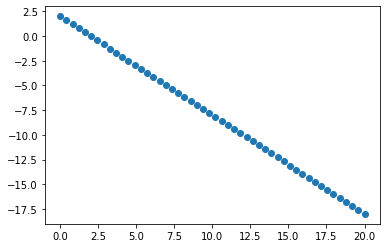

In [ ]:
plt.scatter(X,y)

## Adagrad

In [ ]:
def Adagrad(X ,y , alpha,epsilon ,epoch):
    theta_0 , theta_1 ,v_0,v_1= 0,0,0,0
    loss=[]
    Theta_0=[]
    Theta_1=[]
    H =[]
    ch=0
    for i in range(epoch):
        print(f"\n******* Iteration {i} *******")
        Theta_0.append(theta_0)
        Theta_1.append(theta_1)

        h_x = theta_0 + theta_1 * X
        H.append(h_x)
        print("h(x):" ,h_x)
        err=(h_x - y)
        m_2 = 2*len(X)
        j = 1/m_2 * sum(err**2)
        loss.append(j)
        print("\nError Vector:\n" , err)
        print("\nj = " ,j)
        d_theta_0=  1/len(X) * sum((err))
        d_theta_1= 1/len(X) * sum((err)* X)
        G_V= np.array([[d_theta_0],
                       [d_theta_1]])
        print("\nGradient Vector :\n",G_V)
        G_norm = np.linalg.norm(G_V)
        print("\nGradient Vector Norm :\n",G_norm)
        
        
        
        if i >20:
            if abs(loss[-1] -loss[-2]) <= 0.001:
                ch=1
    
        if G_norm <= 0.001 or ch == 1:
            break
        v_0=v_0+ (d_theta_0 **2)
        v_1=(v_1)+ (d_theta_1 **2) 

        theta_0 = theta_0 -(alpha/(((sqrt(v_0))+epsilon )))*d_theta_0
        theta_1 = theta_1 - (alpha/(((sqrt(v_1))+epsilon )))*d_theta_1
        
       
        print("\ntheta_0_new : ",theta_0)
        print("theta_1_new : ",theta_1)
        
    # ****** Training Report ********
    print("\n******* Training Report *******")
    print(f"\nGradient Descent converged after {i+1} iterations")
    print("\ntheta_0_Opt : " ,theta_0)
    print("theta_1_Opt : " ,theta_1)
    print("\nError Vector: ",err)
    print("\ncost : ",j)
    print("\nh(x) = y_predict: \n" ,h_x)
    print("\ny_actual:\n" , y)
    print()    
        
    return Theta_0, Theta_1 , H ,  loss,i

In [ ]:
Theta_0, Theta_1 , H ,  loss,i=Adagrad(X,y,0.05, 1e-08,500)

Streaming output truncated to the last 5000 lines.
  -3.49291912  -3.77874018  -4.06456124  -4.3503823   -4.63620336
  -4.92202442  -5.20784548  -5.49366654  -5.7794876   -6.06530866
  -6.35112972  -6.63695078  -6.92277184  -7.20859289  -7.49441395
  -7.78023501  -8.06605607  -8.35187713  -8.63769819  -8.92351925
  -9.20934031  -9.49516137  -9.78098243 -10.06680349 -10.35262455
 -10.63844561 -10.92426667 -11.21008773 -11.49590879 -11.78172985
 -12.06755091 -12.35337196 -12.63919302 -12.92501408 -13.21083514
 -13.4966562  -13.78247726 -14.06829832 -14.35411938 -14.63994044]

Error Vector:
 [-2.63470853 -2.51236632 -2.39002412 -2.26768191 -2.1453397  -2.0229975
 -1.90065529 -1.77831309 -1.65597088 -1.53362867 -1.41128647 -1.28894426
 -1.16660206 -1.04425985 -0.92191765 -0.79957544 -0.67723323 -0.55489103
 -0.43254882 -0.31020662 -0.18786441 -0.0655222   0.05682     0.17916221
  0.30150441  0.42384662  0.54618882  0.66853103  0.79087324  0.91321544
  1.03555765  1.15789985  1.28024206  1.

In [ ]:
r2_score(y,H[-1])

0.9484638125790851

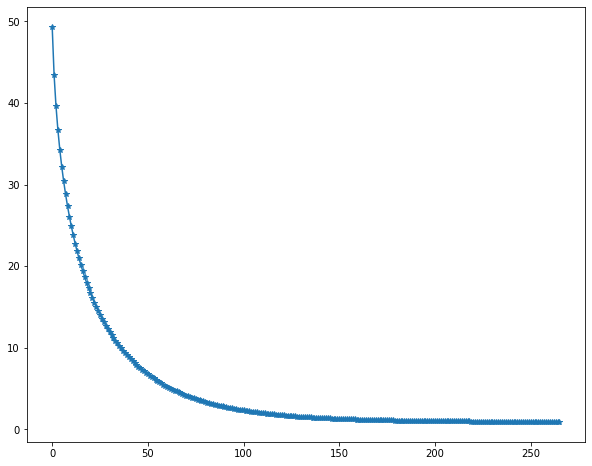

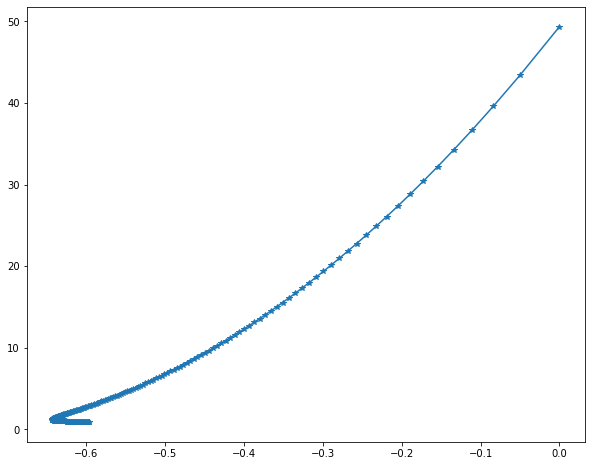

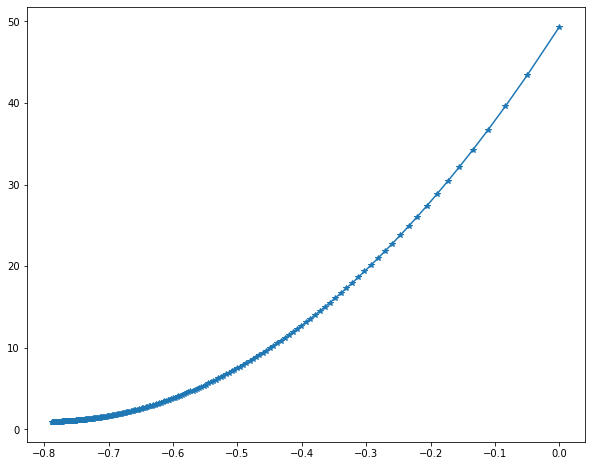

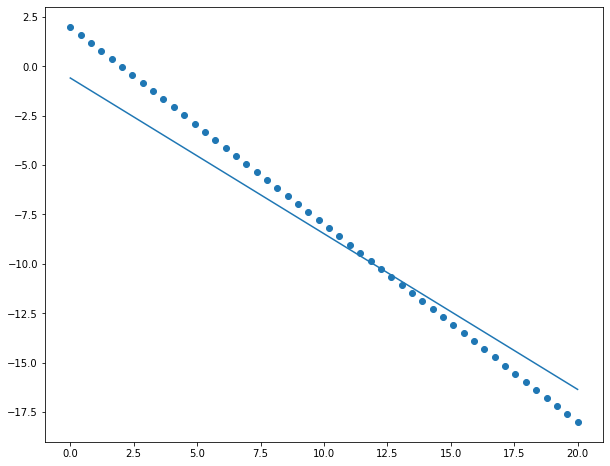

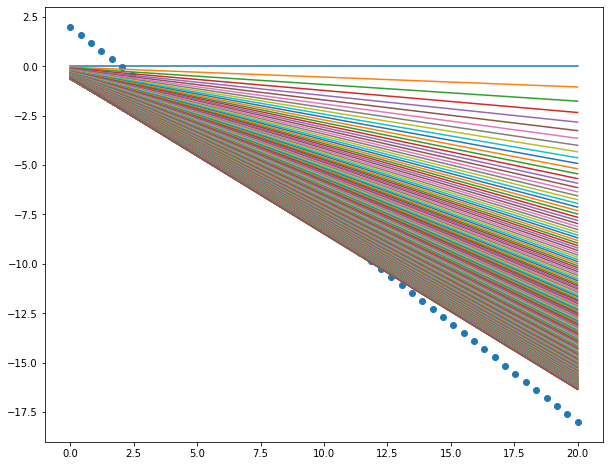

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(loss, marker='*')
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_0, loss, marker='*')
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_1, loss, marker='*')
plt.show
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,H[-1])
plt.show()
plt.figure(figsize=(10,8))
plt.scatter(X,y)
for k in H:
  plt.plot(X,k)

## RMSProp

In [ ]:
def RMS(X ,y , alpha,beta,epsilon ,epoch):
    theta_0 , theta_1 ,v_0,v_1= 0,0,0,0
    loss=[]
    Theta_0=[]
    Theta_1=[]
    H =[]
    ch=0
    for i in range(epoch):
        print(f"\n******* Iteration {i} *******")
        Theta_0.append(theta_0)
        Theta_1.append(theta_1)

        h_x = theta_0 + theta_1 * X
        H.append(h_x)
        print("h(x):" ,h_x)
        err=(h_x - y)
        m_2 = 2*len(X)
        j = 1/m_2 * sum(err**2)
        loss.append(j)
        print("\nError Vector:\n" , err)
        print("\nj = " ,j)
        d_theta_0=  1/len(X) * sum((err))
        d_theta_1= 1/len(X) * sum((err)* X)
        G_V= np.array([[d_theta_0],
                       [d_theta_1]])
        print("\nGradient Vector :\n",G_V)
        G_norm = np.linalg.norm(G_V)
        print("\nGradient Vector Norm :\n",G_norm)
        
        
        
        if i >20:
            if abs(loss[-1] -loss[-2]) <= 0.001:
                ch=1
    
        if G_norm <= 0.001 or ch == 1:
            break
        v_0=(beta*v_0)+ (1-beta)*(d_theta_0 **2)
        v_1=(beta*v_1)+(1-beta)*(d_theta_1 **2) 

        theta_0 = theta_0 -(alpha/(((sqrt(v_0))+epsilon )))*d_theta_0
        theta_1 = theta_1 - (alpha/(((sqrt(v_1))+epsilon )))*d_theta_1
        
       
        print("\ntheta_0_new : ",theta_0)
        print("theta_1_new : ",theta_1)
        
    # ****** Training Report ********
    print("\n******* Training Report *******")
    print(f"\nGradient Descent converged after {i+1} iterations")
    print("\ntheta_0_Opt : " ,theta_0)
    print("theta_1_Opt : " ,theta_1)
    print("\nError Vector: ",err)
    print("\ncost : ",j)
    print("\nh(x) = y_predict: \n" ,h_x)
    print("\ny_actual:\n" , y)
    print()  

    return Theta_0, Theta_1 , H ,  loss,i  


In [ ]:
Theta_0, Theta_1 , H ,  loss,i=RMS(X,y,0.05,0.9, 1e-08,500)


******* Iteration 0 *******
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.158113882383419
theta_1_new :  -0.158113882964

In [ ]:
r2_score(y,H[-1])

0.9993602095484941

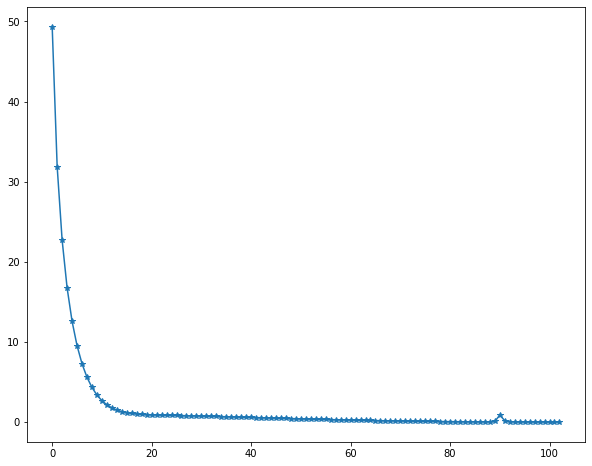

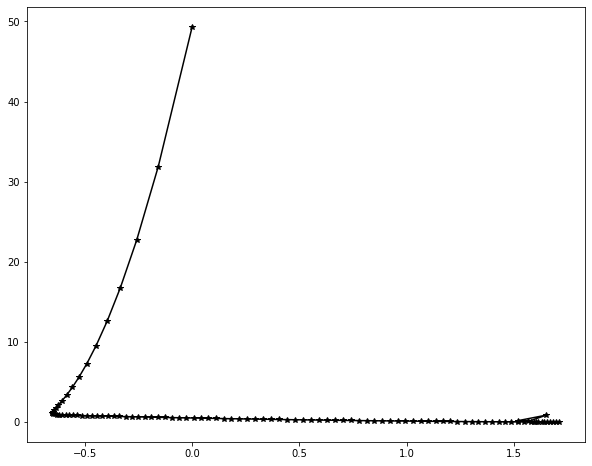

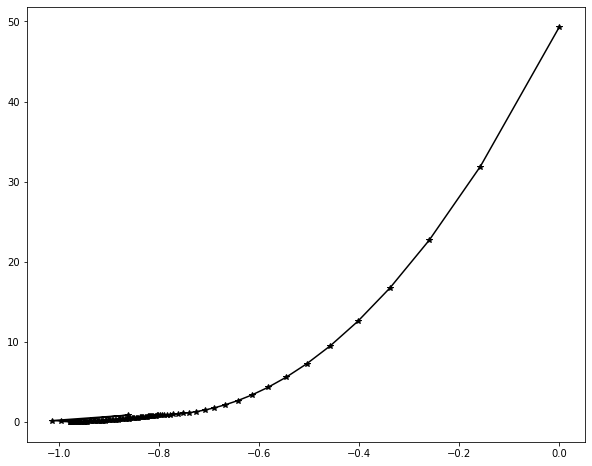

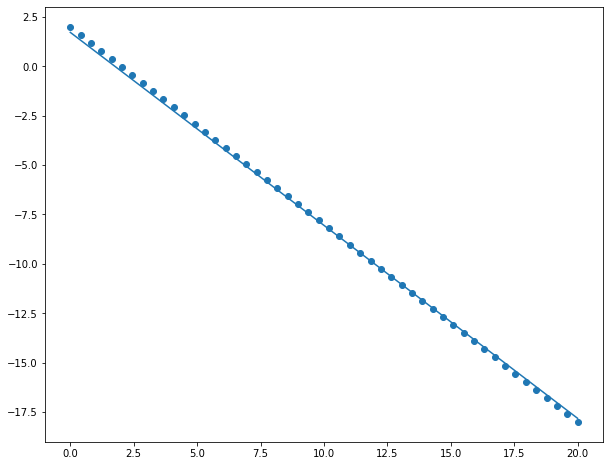

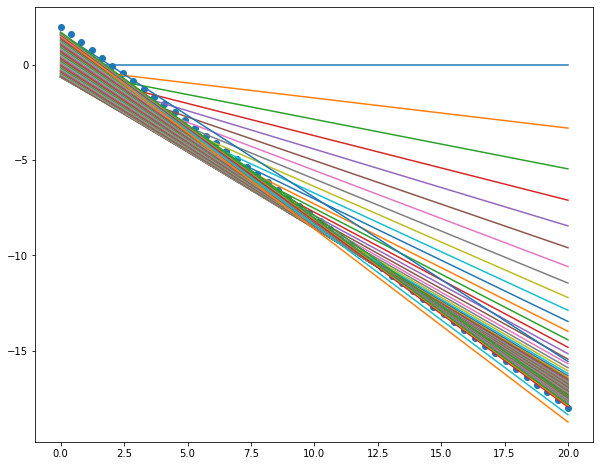

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(loss, marker='*')
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_0, loss, marker='*',color="black")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_1, loss, marker='*',color="black")
plt.show
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,H[-1])
plt.show()
plt.figure(figsize=(10,8))
plt.scatter(X,y)
for k in H:
  plt.plot(X,k)

## Adam

In [ ]:
def Adam(X ,y , alpha,beta1,beta2,epsilon ,epoch):
    theta_0 , theta_1 ,v_0,v_1,m_0,m_1= 0,0,0,0,0,0
    loss=[]
    Theta_0=[]
    Theta_1=[]
    H =[]
    ch=0
    for i in range(epoch):
        print(f"\n******* Iteration {i} *******")
        Theta_0.append(theta_0)
        Theta_1.append(theta_1)

        h_x = theta_0 + theta_1 * X
        H.append(h_x)
        print("h(x):" ,h_x)
        err=(h_x - y)
        m_2 = 2*len(X)
        j = 1/m_2 * sum(err**2)
        loss.append(j)
        print("\nError Vector:\n" , err)
        print("\nj = " ,j)
        d_theta_0=  1/len(X) * sum((err))
        d_theta_1= 1/len(X) * sum((err)* X)
        G_V= np.array([[d_theta_0],
                       [d_theta_1]])
        print("\nGradient Vector :\n",G_V)
        G_norm = np.linalg.norm(G_V)
        print("\nGradient Vector Norm :\n",G_norm)
        
        
        
        if i >20:
            if abs(loss[-1] -loss[-2]) <= 0.001:
                ch=1
    
        if G_norm <= 0.001 or ch == 1:
            break
        m_0=(beta1*m_0)+ (1-beta1)*(d_theta_0)
        m_1=(beta1*m_1)+ (1-beta1)*(d_theta_1)      
        v_0=(beta2*v_0)+ (1-beta2)*(d_theta_0 **2)
        v_1=(beta2*v_1)+(1-beta2)*(d_theta_1 **2)

        m_0_avg=(m_0)/(1-(beta1**(i+1)))
        m_1_avg=(m_1)/(1-(beta1**(i+1)))

        v_0_avg=(v_0)/(1-(beta2**(i+1)))
        v_1_avg=(v_1)/(1-(beta2**(i+1)))




        theta_0 = theta_0 -(alpha/(((sqrt(v_0_avg))+epsilon )))*(m_0_avg)
        theta_1 = theta_1 - (alpha/(((sqrt(v_1_avg))+epsilon )))*(m_1_avg)
        
       
        print("\ntheta_0_new : ",theta_0)
        print("theta_1_new : ",theta_1)
        
    # ****** Training Report ********
    print("\n******* Training Report *******")
    print(f"\nGradient Descent converged after {i+1} iterations")
    print("\ntheta_0_Opt : " ,theta_0)
    print("theta_1_Opt : " ,theta_1)
    print("\nError Vector: ",err)
    print("\ncost : ",j)
    print("\nh(x) = y_predict: \n" ,h_x)
    print("\ny_actual:\n" , y)
    print()  

    return Theta_0, Theta_1 , H ,  loss,i  


##### The following results uses alpha = 0.05, beta1 = 0.05, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [ ]:
Theta_0, Theta_1 , H ,  loss,i =Adam(X,y,0.05,0.05,0.7, 1e-08,500)


******* Iteration 0 *******
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.0499999999375
theta_1_new :  -0.04999999999564

In [ ]:
r2_score(y,H[-1])

0.9859079693483163

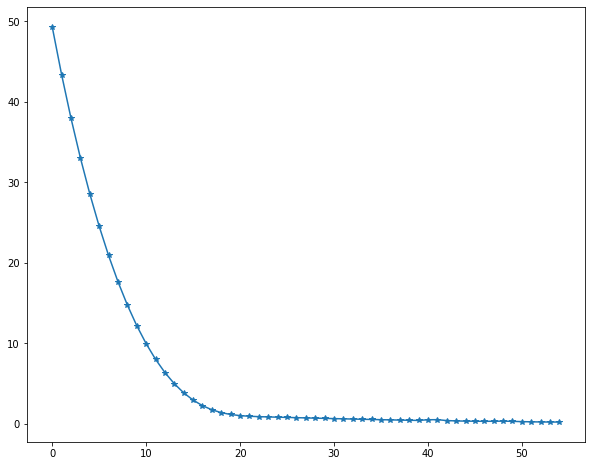

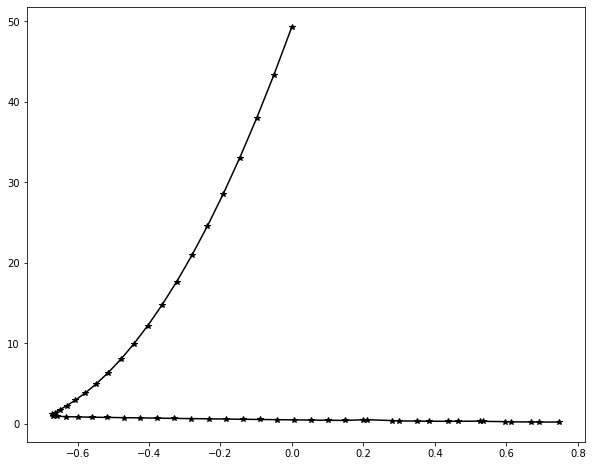

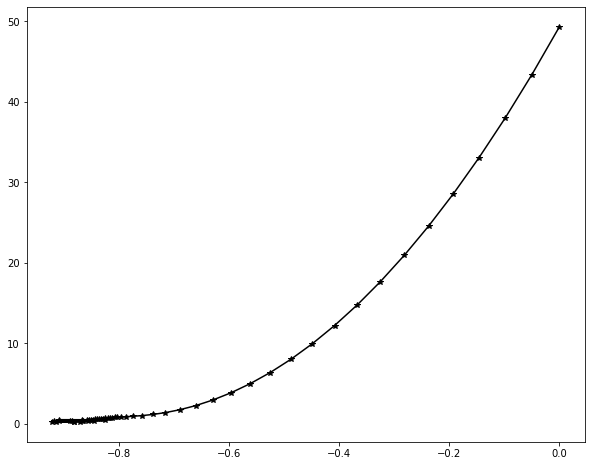

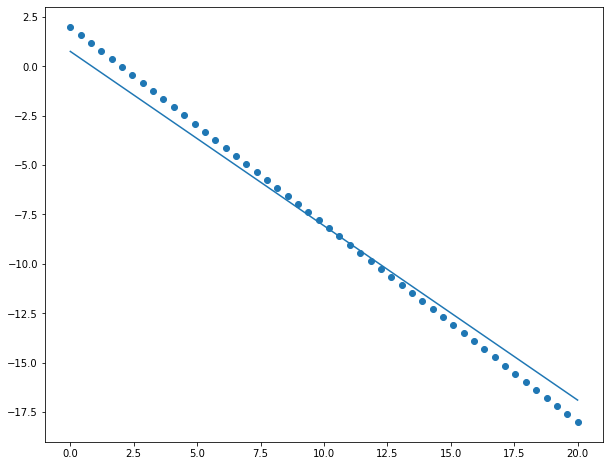

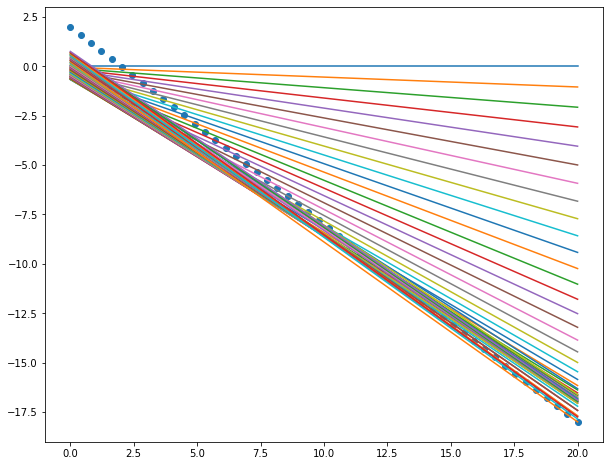

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(loss, marker='*')
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_0, loss, marker='*',color="black")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_1, loss, marker='*',color="black")
plt.show
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,H[-1])
plt.show()
plt.figure(figsize=(10,8))
plt.scatter(X,y)
for k in H:
  plt.plot(X,k)

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
Theta_0, Theta_1 , H ,  loss,i =Adam(X,y,0.01,0.9,0.99, 1e-08,5000)

Streaming output truncated to the last 5000 lines.
 -0.39091839 -0.34379577 -0.29667315 -0.24955053 -0.20242791 -0.15530529
 -0.10818267 -0.06106005 -0.01393743  0.03318519  0.08030781  0.12743043
  0.17455305  0.22167567  0.26879829  0.31592092  0.36304354  0.41016616
  0.45728878  0.5044114   0.55153402  0.59865664  0.64577926  0.69290188
  0.7400245   0.78714712]

j =  0.2986894801944493

Gradient Vector :
 [[-0.36735708]
 [ 0.33185193]]

Gradient Vector Norm :
 0.4950524493005811

theta_0_new :  0.48338518593021007
theta_1_new :  -0.8849507746771221

******* Iteration 423 *******
h(x): [  0.48338519   0.12218079  -0.23902361  -0.60022801  -0.96143241
  -1.3226368   -1.6838412   -2.0450456   -2.40625     -2.76745439
  -3.12865879  -3.48986319  -3.85106759  -4.21227199  -4.57347638
  -4.93468078  -5.29588518  -5.65708958  -6.01829397  -6.37949837
  -6.74070277  -7.10190717  -7.46311157  -7.82431596  -8.18552036
  -8.54672476  -8.90792916  -9.26913356  -9.63033795  -9.99154235
 -10.35

In [ ]:
r2_score(y,H[-1])

0.9952892444628807

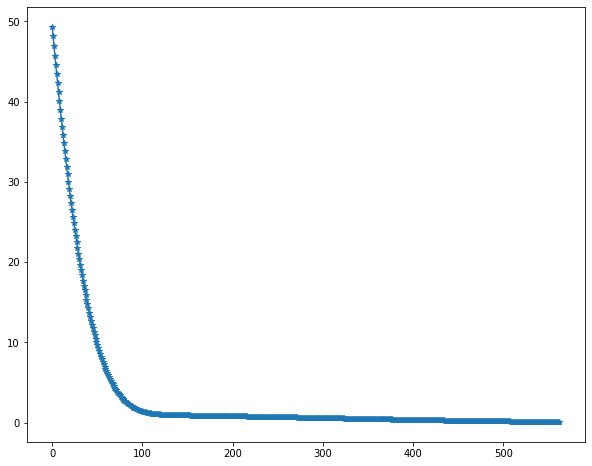

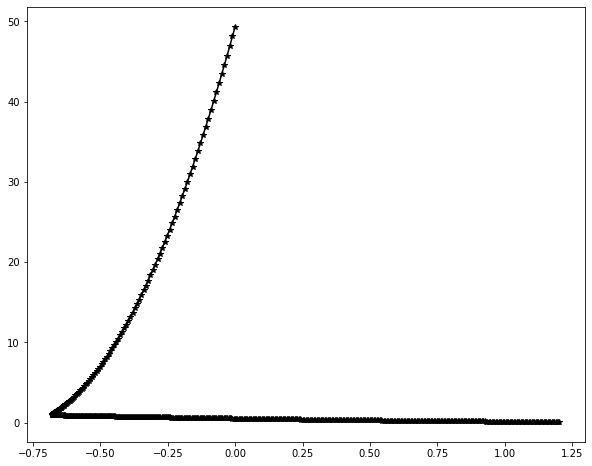

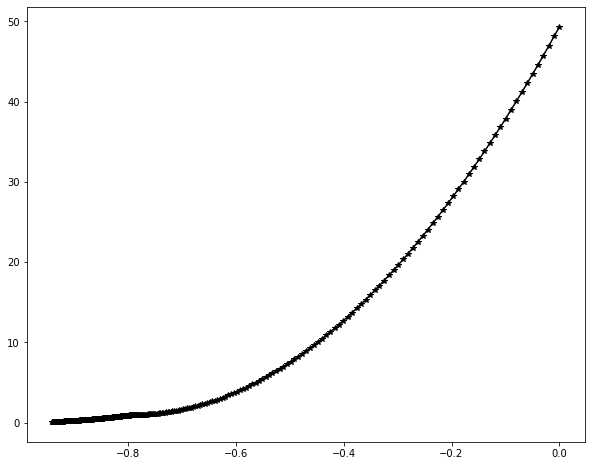

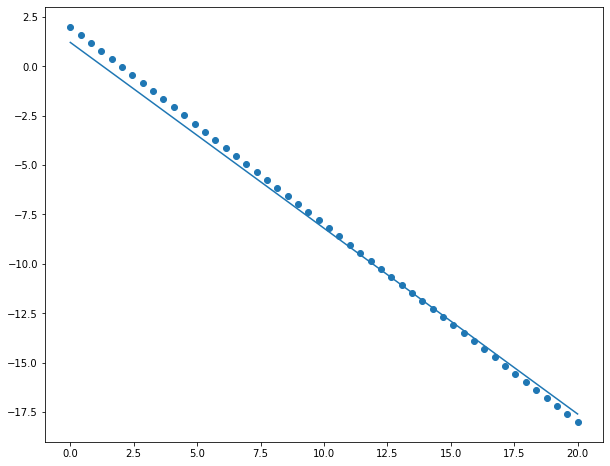

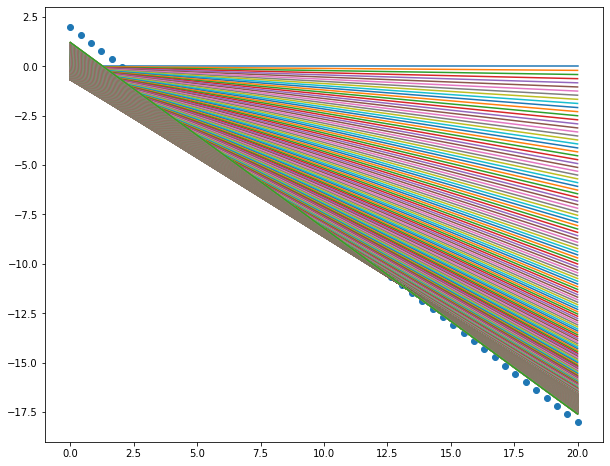

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(loss, marker='*')
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_0, loss, marker='*',color="black")
plt.show()
plt.figure(figsize=(10,8))
plt.plot(Theta_1, loss, marker='*',color="black")
plt.show
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,H[-1])
plt.show()
plt.figure(figsize=(10,8))
plt.scatter(X,y)
for k in H:
  plt.plot(X,k)